# Test the whole workflow with Igraph

Created: 2020-09-04

### Undirected

In [1]:
import sys
sys.path.append('..')

In [2]:
from mtsim import MTMUndirected
from mtsim.sample_networks import load_network_2_undirected

In [3]:
df_nodes, df_link_types, df_links = load_network_2_undirected()

In [4]:
model = MTMUndirected()
model.read_data(df_nodes, df_link_types, df_links)
model.compute_skims()
model.generate("ALL", "pop", "pop", 0.3)
model.distribute("ALL", "t0", "exp", -0.02)
model.assign("tcur")

In [5]:
model.df_lt.columns

Index(['type', 'type_name', 'qmax', 'v0', 'a', 'b'], dtype='object')

In [6]:
df_link_types.columns

Index(['type', 'type_name', 'qmax', 'v0', 'a', 'b'], dtype='object')

In [7]:
import numpy as np

COLS = ["type", "type_name", "v0", "qmax", "a", "b"]
np.isin(COLS, model.df_lt.columns).all()

True

In [9]:
model.df_links.head()

id  type  length              name    count type_name  \
node_from node_to                                                          
1         2         1     1  36.000          BA-TT D1  45085.0       D_6   
2         3         2     2  36.006          TT-NR R1  25135.0       D_4   
          4         3     2  75.005          TT-TN D1  19088.0       D_4   
4         5         4     2  71.690          TN-ZA D1  17280.0       D_4   
5         6         5     5  24.330  ZA-MT I/18, I/65  20196.0  I_2 slow   

                    qmax   v0     a  b         t0             q        tcur  \
node_from node_to                                                             
1         2        70000  110  0.15  4  19.636364  91674.023936   28.300900   
2         3        50000  125  0.15  4  17.282880  68541.749241   26.437664   
          4        50000  125  0.15  4  36.002400  53550.530451   43.107952   
4         5        50000  125  0.15  4  34.411200  43080.246798   37.255817   
5         6        15000   65  0.15  4  22.458462  42426.754323  238.066755   

                         vcur  
node_from node_to              
1         2         76.322660  
2         3         81.715238  
          4        104.396053  
4         5        115.455796  
5         6          6.131894

<AxesSubplot:xlabel='count', ylabel='q'>

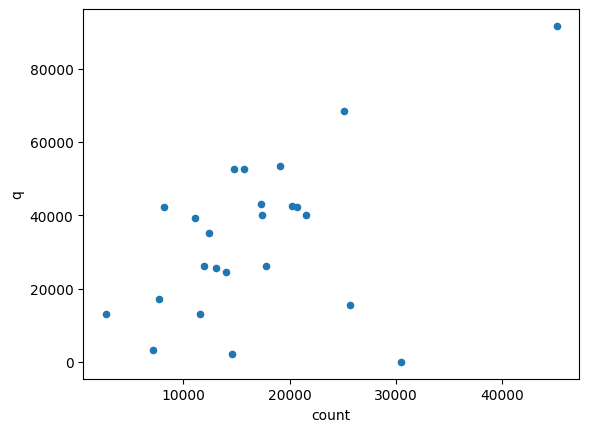

In [10]:
model.df_links.plot.scatter(x="count", y="q")

### Directed

In [11]:
from mtsim import MTM
from mtsim.sample_networks import load_network_2

In [12]:
df_nodes, df_link_types, df_links = load_network_2()

In [13]:
model = MTM()
model.read_data(df_nodes, df_link_types, df_links)
model.compute_skims()
model.generate("ALL", "pop", "pop", 0.3)
model.distribute("ALL", "t0", "exp", -0.02)
model.assign("tcur")

In [14]:
model.df_links.head()

id  type  length      name    count type_name   qmax   v0  \
node_from node_to                                                              
1         2         1     1  36.000  BA-TT D1  22543.0       D_6  35000  110   
2         1         1     1  36.000  BA-TT D1  22543.0       D_6  35000  110   
          3         2     2  36.006  TT-NR R1  12568.0       D_4  25000  125   
3         2         2     2  36.006  TT-NR R1  12568.0       D_4  25000  125   
2         4         3     2  75.005  TT-TN D1   9544.0       D_4  25000  125   

                      a  b         t0             q       tcur        vcur  \
node_from node_to                                                            
1         2        0.15  4  19.636364  45837.011968  28.300900   76.322660   
2         1        0.15  4  19.636364  45837.011968  28.300900   76.322660   
          3        0.15  4  17.282880  34270.874620  26.437664   81.715238   
3         2        0.15  4  17.282880  34270.874620  26.437664   81.715238   
2         4        0.15  4  36.002400  26775.265225  43.107952  104.396053   

                         geh      var_geh  
node_from node_to                          
1         2        39.837741  1587.045623  
2         1        39.837741  1587.045623  
          3        44.846549  2011.212996  
3         2        44.846549  2011.212996  
2         4        40.435576  1635.035838

<AxesSubplot:xlabel='count', ylabel='q'>

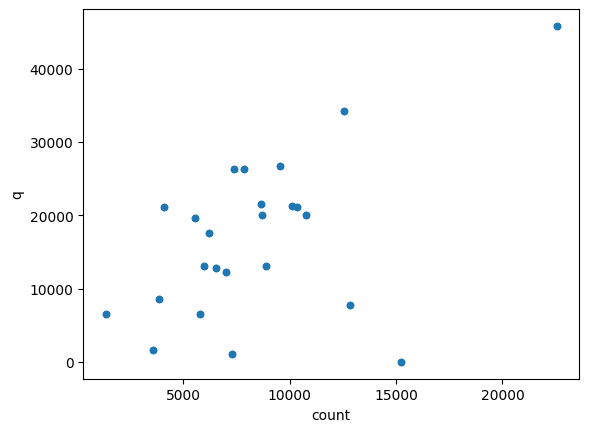

In [15]:
model.df_links.plot.scatter(x="count", y="q")